In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
print('backend :', keras.backend.backend())
print('keras version :', keras.__version__)

Using TensorFlow backend.


backend : tensorflow
keras version : 2.2.4


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 611058815196744482
]


In [4]:
# cargar la interfaz a la base de datos que vienen con keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Dimensiones del conjunto de entrenamiento: ', train_images.shape)
print('Dimensiones del conjunto de evaluación: ', train_images.shape)

num_data, nrows, ncols = train_images.shape

11493376/11490434 [==============================] - 4s 0us/step
Dimensiones del conjunto de entrenamiento:  (60000, 28, 28)
Dimensiones del conjunto de evaluación:  (60000, 28, 28)


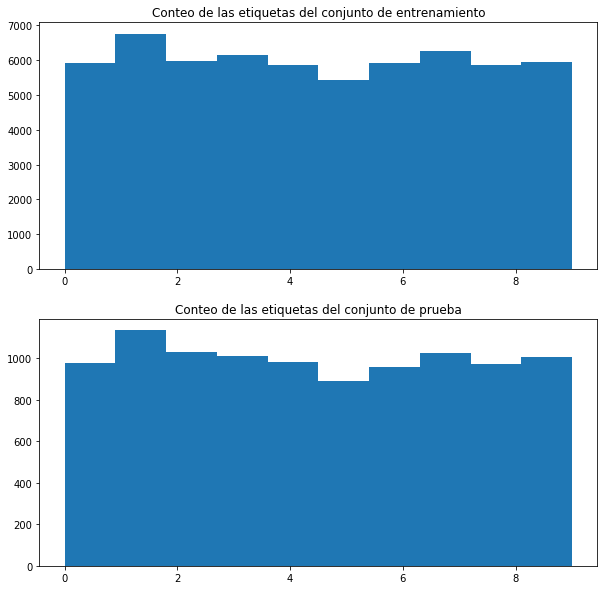

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.hist(train_labels[:], bins=10)
plt. title('Conteo de las etiquetas del conjunto de entrenamiento')
plt.subplot(212)
plt.hist(test_labels[:], bins=10)
plt. title('Conteo de las etiquetas del conjunto de prueba')
plt.show()

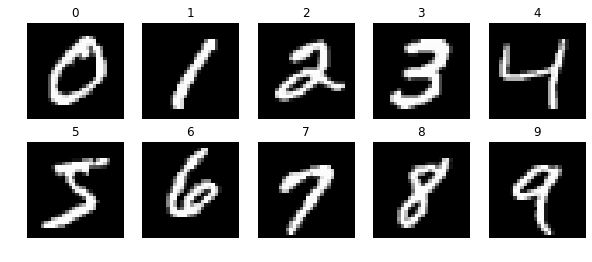

In [6]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_labels).index(i)
    plt.imshow(train_images[idx], 'gray')
    plt.title(train_labels[idx])
    plt.axis('off')
    
plt.show()

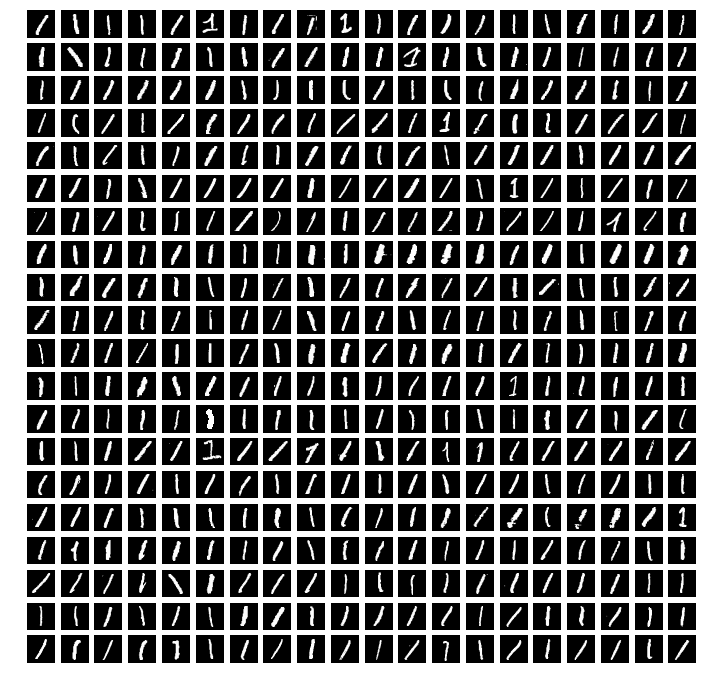

In [7]:
nrowsIm = 20
ncolsIm = 20
numIm = nrowsIm*ncolsIm

digit=1
Indexes = np.where(train_labels==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i,idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(train_images[idx], 'gray')
    plt.axis('off')
    
plt.show()

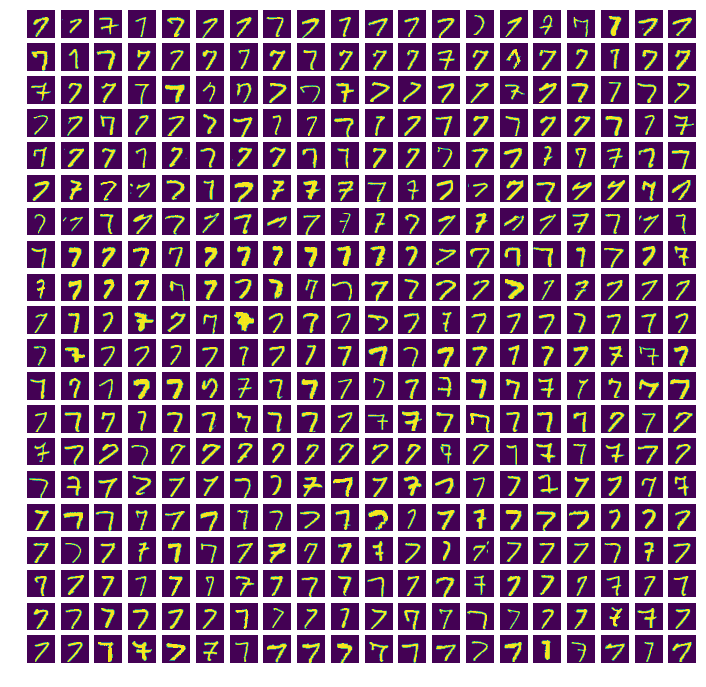

In [8]:
digit=7
Indexes = np.where(train_labels==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i,idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(train_images[idx])
    plt.axis('off')
    
plt.show()

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images  = test_images.reshape((10000, 28 * 28))
test_images  = test_images.astype('float32') / 255

numIm, szIm  = train_images.shape


In [10]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

nn = models.Sequential()            # Modelo secuencial 

In [12]:
# añadir al modelo nn la primera capa oculta
nn.add(layers.Dense(units=512,                    # numero de neuronas en la capa 
                    activation='relu',            # funcion de activacion = lineal rectificada
                    input_shape=(szIm,)))         # forma de la entrada: (szIm, ) la otra 
                                                  # dimension es el tamano de lote (szBatch), 
                                                  # que se define en 'fit'
# añadir otra capa
# .....         dejado de ejercicio probar incluir esta capa 

# añadir capa de salida
nn.add(layers.Dense(units=10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
nn.compile(optimizer='rmsprop',
           loss     ='categorical_crossentropy',
           metrics  =['accuracy'])

In [16]:
from keras import optimizers

# parametros de metodo de optimizacion
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# parametros del procedimiento de aprendizaje (incluye que optimizador usar)
nn.compile(loss='mean_squared_error',  optimizer=sgd)

In [17]:
import time
tic=time.time()

history = nn.fit(x = train_images, 
                 y = train_labels, 
                 validation_split=.2,
                 epochs    =20, 
                 shuffle   =True,
                 batch_size=128,
                 verbose=2)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.0781 - val_loss: 0.0619
Epoch 2/20
 - 2s - loss: 0.0493 - val_loss: 0.0377
Epoch 3/20
 - 3s - loss: 0.0335 - val_loss: 0.0273
Epoch 4/20
 - 3s - loss: 0.0265 - val_loss: 0.0225
Epoch 5/20
 - 4s - loss: 0.0229 - val_loss: 0.0200
Epoch 6/20
 - 3s - loss: 0.0207 - val_loss: 0.0183
Epoch 7/20
 - 8s - loss: 0.0192 - val_loss: 0.0172
Epoch 8/20
 - 3s - loss: 0.0181 - val_loss: 0.0163
Epoch 9/20
 - 3s - loss: 0.0173 - val_loss: 0.0156
Epoch 10/20
 - 3s - loss: 0.0166 - val_loss: 0.0151
Epoch 11/20
 - 4s - loss: 0.0160 - val_loss: 0.0146
Epoch 12/20
 - 3s - loss: 0.0155 - val_loss: 0.0142
Epoch 13/20
 - 4s - loss: 0.0151 - val_loss: 0.0139
Epoch 14/20
 - 3s - loss: 0.0147 - val_loss: 0.0136
Epoch 15/20
 - 3s - loss: 0.0144 - val_loss: 0.0133
Epoch 16/20
 - 3s - loss: 0.0141 - val_loss: 0.0131
Epoch 17/20
 - 4s - loss: 0.0138 - val_loss: 0.0129
Epoch 18/20
 - 3s - loss: 0

In [21]:
history_dict = history.history
dictkeys=list(history_dict.keys())
dictkeys

['val_loss', 'loss']

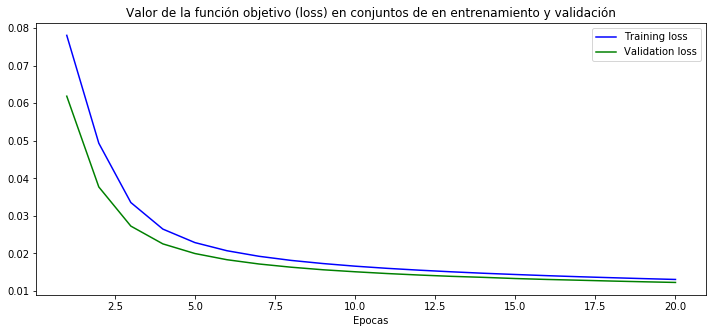

In [19]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)


plt.figure(figsize=(12,5))
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Valor de la función objetivo (loss) en conjuntos de en entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('')
plt.legend()

plt.show()

In [20]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


plt.figure(figsize=(12,5))
plt.plot(epochs, acc_values, 'b', label='Accuracy')
plt.plot(epochs, val_acc_values, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

KeyError: 'acc'

In [22]:
# cargar la interfaz a la base de datos que vienen con keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# prepocesamiento de los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

numIm, szIm = train_images.shape

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

# Arquitectura de la red
from keras import models
from keras import layers
import time

nn = models.Sequential()    
nn.add(layers.Dense(units=512,activation='relu', input_shape=(szIm,)))         
nn.add(layers.Dense(units=10, activation='softmax'))

nn.compile(optimizer='rmsprop',
           loss     ='categorical_crossentropy',
           metrics  =['accuracy'])

tic=time.time()
history = nn.fit(x = train_images, 
                 y = train_labels, 
                 validation_split=0.2,
                 epochs    = 6, 
                 shuffle   = True,
                 batch_size = 128,
                 verbose=2)
print('Tiempo: {} secs'.format(time.time()-tic))

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 4s - loss: 0.2890 - acc: 0.9168 - val_loss: 0.1530 - val_acc: 0.9552
Epoch 2/6
 - 4s - loss: 0.1195 - acc: 0.9644 - val_loss: 0.1046 - val_acc: 0.9689
Epoch 3/6
 - 3s - loss: 0.0783 - acc: 0.9774 - val_loss: 0.0972 - val_acc: 0.9720
Epoch 4/6
 - 3s - loss: 0.0570 - acc: 0.9834 - val_loss: 0.0840 - val_acc: 0.9766
Epoch 5/6
 - 3s - loss: 0.0435 - acc: 0.9867 - val_loss: 0.0932 - val_acc: 0.9737
Epoch 6/6
 - 3s - loss: 0.0336 - acc: 0.9896 - val_loss: 0.0865 - val_acc: 0.9759
Tiempo: 20.463664531707764 secs


In [23]:
results = nn.evaluate(test_images, test_labels)
print(results)

10000/10000 [==============================] - 1s 54us/step
[0.0769736237062374, 0.9774]


In [24]:
y_pred = nn.predict(test_images).squeeze()

score = nn.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0769736237062374
Test accuracy: 0.9774


In [25]:
import numpy as np
# Import the modules from sklearn.metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

y_test_label = np.argmax(test_labels,1) 
y_pred_label = np.argmax(y_pred,1)

# Confusion matrix
C=confusion_matrix(y_pred_label, y_test_label)
print(C)

[[ 971    0    8    0    3    4    5    1    4    4]
 [   0 1123    0    0    0    0    2    3    0    2]
 [   0    2  989    1    1    0    1    5    0    0]
 [   1    0    8  998    1   12    1    5    6    9]
 [   1    0    2    0  956    1    2    0    2    5]
 [   0    0    0    2    0  860    3    0    1    1]
 [   1    2    2    0    3    5  942    0    1    0]
 [   3    0   13    5    4    4    0 1011    4   15]
 [   2    8   10    3    2    4    2    0  954    3]
 [   1    0    0    1   12    2    0    3    2  970]]


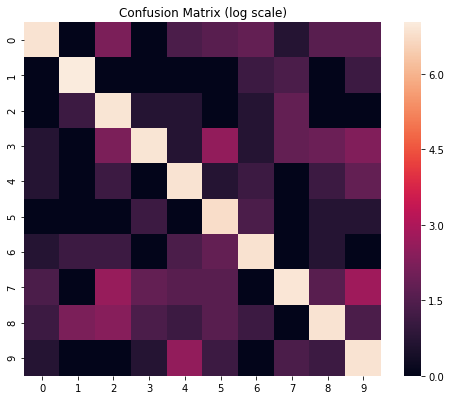

In [26]:
import seaborn as sns
# En escala logaritmica !
plt.figure(figsize=(8,6.5))
plt.title('Confusion Matrix (log scale)')
sns.heatmap(np.log(C+1), xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.show()

In [27]:
precision_score(y_pred_label, y_test_label, average='macro')

0.9771920328562673

In [28]:
# Recall
recall_score(y_pred_label, y_test_label,  average='macro')

0.9776425350755249

In [29]:
f1_score(y_pred_label, y_test_label,  average='macro')

0.9773004314410029

In [30]:
cohen_kappa_score(y_pred_label, y_test_label)

0.9748786781880755